# EDA and Data Cleaning

## Introduction

In this notebook, we explore the data we've been given, identify and fix missing values, and try to prune our set of features.

## Thought Process



My preference is to be aggressive with purging features and rows that don't seem useful. Some metrics I set for purging data are as follows:

- Drop no more than $10\%$ - $20\%$ of my rows.
- Drop numeric columns that don't meet some pre-determined threshold of correlation with our target variable (`saleprice`)
- Drop categorical columns that are overwhelmingly ($65\%$ here) a single value

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Datasets File Path

train_path = './datasets/train.csv'

In [3]:
ames = pd.read_csv(train_path)
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Size of our dataframe
ames.shape

(2051, 81)

In [5]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# Remove spaces and make all labels lower case
ames.columns = [column.lower().replace(' ', '_') for column in ames.columns]
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
len(set(ames['id']))

2051

In [8]:
len(set(ames['pid']))

2051

The columns `id` and `pid` have distinct values. We can drop one, and use the other as the index. Let's use `id` since that is required in the submission.

In [9]:
ames.drop('pid', axis = 1, inplace = True)
ames.set_index('id', inplace = True, verify_integrity = True)

In [10]:
ames.head(5)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.00,190.0
lot_frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0


There appears to be an erroneous row in `garage_yr_blt`. It doesn't make sense to have one built in the year `2207`.

In [12]:
# View columns missing any of their entries

columns_w_missing = [(name, value) for (name, value) in zip(ames.isna().sum().index, ames.isna().sum().values) if value > 1]
columns_w_missing

[('lot_frontage', 330),
 ('alley', 1911),
 ('mas_vnr_type', 22),
 ('mas_vnr_area', 22),
 ('bsmt_qual', 55),
 ('bsmt_cond', 55),
 ('bsmt_exposure', 58),
 ('bsmtfin_type_1', 55),
 ('bsmtfin_type_2', 56),
 ('bsmt_full_bath', 2),
 ('bsmt_half_bath', 2),
 ('fireplace_qu', 1000),
 ('garage_type', 113),
 ('garage_yr_blt', 114),
 ('garage_finish', 114),
 ('garage_qual', 114),
 ('garage_cond', 114),
 ('pool_qc', 2042),
 ('fence', 1651),
 ('misc_feature', 1986)]

In [13]:
# View columns with missing more than 5% of their entries

columns_w_missing_5 = [(name, (value /2051) * 100) for (name, value) in zip(ames.isna().sum().index, ames.isna().sum().values) if value > 0.05 * 2051]
columns_w_missing_5

[('lot_frontage', 16.089712335446123),
 ('alley', 93.1740614334471),
 ('fireplace_qu', 48.75670404680644),
 ('garage_type', 5.509507557289127),
 ('garage_yr_blt', 5.558264261335934),
 ('garage_finish', 5.558264261335934),
 ('garage_qual', 5.558264261335934),
 ('garage_cond', 5.558264261335934),
 ('pool_qc', 99.56118966357874),
 ('fence', 80.49731838127742),
 ('misc_feature', 96.83081423695758)]

In [14]:
# View columns with missing more than 10% of their entries

columns_w_missing_10 = [(name, (value /2051) * 100) for (name, value) in zip(ames.isna().sum().index, ames.isna().sum().values) if value > 0.10 * 2051]
columns_w_missing_10

[('lot_frontage', 16.089712335446123),
 ('alley', 93.1740614334471),
 ('fireplace_qu', 48.75670404680644),
 ('pool_qc', 99.56118966357874),
 ('fence', 80.49731838127742),
 ('misc_feature', 96.83081423695758)]

The following table reports the columns missing more than 10\% of their entries, their type, percentage of entries that are missing, and their definitions according to the data dictionary provided on Kaggle:

| Column Name | Type | % Entries Missing | Definition |
| :----------:| :---:| :---------------: | :--------- |
| `alley` | string | 93.17 | Type of alley access to property |
| `fence` | string | 80.50 | Fence Quality |
| `fireplace_qu` | string | 48.75 | Fireplace Quality |
| `lot_frontage` | numeric | 16.09 | Linear feet of street connected to property |
| `misc_feature` | string | 96.83 | Linear feet of street connected to property |
| `pool_qc` | string | 99.56 | Linear feet of street connected to property |

Drop all these columns except for `lot_frontage` and `fireplace_qu` as including them will likely result in 'imbalanced' data that skews our models. We will likely impute missing values for `lot_frontage` and `fireplace_qu`.

In [15]:
ames.drop(['alley', 'fence', 'misc_feature', 'pool_qc'], axis = 1, inplace = True)
ames.head(5)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


It makes sense to drop those categorical columns that have a high percentage of a single value. Again, this is to avoid creating models that are skewed.

In this case, I am defining a 'high' percentage to be 65\% or higher.

In [16]:
# Select non-numeric columns. Convert the columns into sets so that set theory operations can be used

set_of_all_columns = set(ames.columns)
set_of_numeric_columns = set(ames.describe().T.index)

set_of_non_numeric_columns = set_of_all_columns - set_of_numeric_columns

In [17]:
# What do the 'high' percentage columns look like?

for column in set_of_non_numeric_columns:
    if sum(ames.loc[:,column].value_counts(normalize = True) > 0.65) == 1:
        print(f'{column}')
        print(ames.loc[:,column].value_counts(normalize = True))
        print('\n')

bsmt_cond
TA    0.918838
Gd    0.044589
Fa    0.032565
Po    0.002505
Ex    0.001503
Name: bsmt_cond, dtype: float64


roof_matl
CompShg    0.987323
Tar&Grv    0.007314
WdShngl    0.002438
WdShake    0.001950
Membran    0.000488
ClyTile    0.000488
Name: roof_matl, dtype: float64


bsmt_exposure
No    0.671851
Av    0.144506
Gd    0.101856
Mn    0.081786
Name: bsmt_exposure, dtype: float64


paved_drive
Y    0.907362
N    0.073623
P    0.019015
Name: paved_drive, dtype: float64


sale_type
WD       0.868357
New      0.078011
COD      0.030717
ConLD    0.008289
CWD      0.004876
ConLI    0.003413
ConLw    0.002438
Con      0.001950
Oth      0.001950
Name: sale_type, dtype: float64


condition_1
Norm      0.861531
Feedr     0.053145
Artery    0.034130
RRAn      0.017552
PosN      0.013164
RRAe      0.010239
PosA      0.005851
RRNn      0.002925
RRNe      0.001463
Name: condition_1, dtype: float64


ms_zoning
RL         0.779132
RM         0.154071
FV         0.049244
C (all)    0.009264


In [18]:
# Use a list comprehension to select columns that are more than 65% of a single value

columns_heavy_one_val = [column for column in set_of_non_numeric_columns if sum(ames.loc[:,column].value_counts(normalize = True) > 0.65) == 1]
columns_heavy_one_val

['bsmt_cond',
 'roof_matl',
 'bsmt_exposure',
 'paved_drive',
 'sale_type',
 'condition_1',
 'ms_zoning',
 'garage_cond',
 'heating',
 'functional',
 'land_slope',
 'garage_qual',
 'lot_config',
 'condition_2',
 'central_air',
 'electrical',
 'street',
 'exter_cond',
 'bsmtfin_type_2',
 'utilities',
 'roof_style',
 'bldg_type',
 'land_contour']

In [19]:
ames.drop(columns_heavy_one_val, axis = 1, inplace = True)

In [20]:
ames.loc[ames.T.isna().sum() > 1,:]

,ms_subclass,lot_frontage,lot_area,lot_shape,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,NaN,13517,IR1,Sawyer,2Story,6,8,1976,2005,...,0,44,0,0,0,0,0,3,2010,130500
145,20,NaN,12160,IR1,NAmes,1Story,5,5,1959,1959,...,0,0,0,0,0,0,0,5,2010,142000
1942,20,NaN,15783,Reg,OldTown,1Story,5,5,1952,1952,...,0,324,0,0,0,0,400,6,2007,112500
807,70,120.0,26400,Reg,SawyerW,2Story,5,7,1880,2007,...,0,0,0,0,0,0,0,6,2009,131000
2393,60,103.0,12867,IR1,NridgHt,2Story,8,5,2005,2006,...,243,142,0,0,0,0,0,7,2006,344133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,20,NaN,7791,IR1,Sawyer,1Story,5,8,1963,1995,...,0,0,0,0,0,0,0,10,2009,129000
2628,90,75.0,8512,Reg,NAmes,1Story,5,5,1960,1960,...,0,0,0,0,0,0,0,9,2006,119000
2288,160,21.0,1495,Reg,MeadowV,2Story,4,6,1970,1970,...,0,64,0,0,0,0,0,5,2007,93900


In [21]:
# Next we handle the column with missing values: lot_frontage

ames.loc[:,['lot_frontage']].describe()

,lot_frontage
count,1721.000000
mean,69.055200
std,23.260653
min,21.000000
25%,58.000000
50%,68.000000
75%,80.000000
max,313.000000


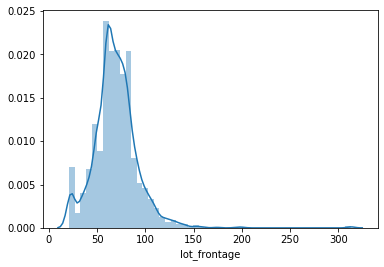

In [22]:
# Distribution of `lot_frontage`

sns.distplot(ames.loc[:,'lot_frontage'])

In [23]:
# Find outliers for 'lot_frontage'

more_than_2_std_from_mean = (ames.loc[:,'lot_frontage'] - ames.loc[:,'lot_frontage'].mean()) / ames.loc[:,'lot_frontage'].std() > 1
ames.loc[more_than_2_std_from_mean,['lot_frontage']].shape

(189, 1)

In [24]:
# 'lot_frontage' doesn't appear to have too many outliers, so we may replace missing values with the median + 0.5
# The entries ending in '0.5' are a clue they have been imputed.

lot_frontage_mean = ames.loc[:,'lot_frontage'].median()
ames.loc[:,'lot_frontage'] = ames.loc[:,'lot_frontage'].apply(lambda x : lot_frontage_mean + 0.5 if np.isnan(x) else x)

In [25]:
ames.loc[:,'lot_frontage']

id
109     68.5
544     43.0
153     68.0
318     73.0
255     82.0
        ... 
1587    79.0
785     68.5
916     57.0
639     80.0
10      60.0
Name: lot_frontage, Length: 2051, dtype: float64

In [26]:
# Deal with `fireplace_qu`
# Replace NaN's 

ames.loc[:,'fireplace_qu'].fillna('NA', inplace = True)
ames.loc[:,'fireplace_qu'].value_counts(normalize = True)

NA    0.487567
Gd    0.254998
TA    0.198440
Fa    0.028766
Ex    0.015115
Po    0.015115
Name: fireplace_qu, dtype: float64

This wraps up our work on columns. Now, we turn our attention to rows.

In [27]:
rows_w_missing_df = ames.loc[ames.isna().T.sum() > 1, :]
rows_w_missing_df

,ms_subclass,lot_frontage,lot_area,lot_shape,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
id,,,,,,,,,,,,,,,,,,,,,
807,70,120.0,26400,Reg,SawyerW,2Story,5,7,1880,2007,...,0,0,0,0,0,0,0,6,2009,131000
2393,60,103.0,12867,IR1,NridgHt,2Story,8,5,2005,2006,...,243,142,0,0,0,0,0,7,2006,344133
2243,190,75.0,8250,Reg,IDOTRR,2Story,5,6,1895,2006,...,0,0,133,0,0,0,0,6,2007,119600
2383,20,107.0,13891,Reg,NridgHt,1Story,10,5,2006,2006,...,216,229,0,0,0,0,0,9,2006,465000
330,160,21.0,1476,Reg,MeadowV,2Story,4,7,1970,1970,...,200,26,0,0,0,0,0,3,2010,76000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,90,94.0,9400,Reg,Mitchel,2Story,6,5,1971,1971,...,128,0,0,0,0,0,0,4,2010,139000
2880,30,69.0,12366,Reg,IDOTRR,1Story,3,5,1945,1950,...,0,0,23,0,0,0,0,10,2006,51689
2628,90,75.0,8512,Reg,NAmes,1Story,5,5,1960,1960,...,0,0,0,0,0,0,0,9,2006,119000


In [28]:
rows_w_missing_df.shape[0] / ames.shape[0]

0.08824963432471965

By this point, only about $8.8\%$ of rows are missing data. We may just drop them.

In [29]:
ames.drop(rows_w_missing_df.index, inplace = True)
ames

,ms_subclass,lot_frontage,lot_area,lot_shape,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,68.5,13517,IR1,Sawyer,2Story,6,8,1976,2005,...,0,44,0,0,0,0,0,3,2010,130500
544,60,43.0,11492,IR1,SawyerW,2Story,7,5,1996,1997,...,0,74,0,0,0,0,0,4,2009,220000
153,20,68.0,7922,Reg,NAmes,1Story,5,7,1953,2007,...,0,52,0,0,0,0,0,1,2010,109000
318,60,73.0,9802,Reg,Timber,2Story,5,5,2006,2007,...,100,0,0,0,0,0,0,4,2010,174000
255,50,82.0,14235,IR1,SawyerW,1.5Fin,6,8,1900,1993,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,20,79.0,11449,IR1,Timber,1Story,8,5,2007,2007,...,0,276,0,0,0,0,0,1,2008,298751
785,30,68.5,12342,IR1,Edwards,1Story,4,5,1940,1950,...,158,0,0,0,0,0,0,3,2009,82500
916,50,57.0,7558,Reg,Crawfor,1.5Fin,6,6,1928,1950,...,0,0,0,0,0,0,0,3,2009,177000


In [30]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_subclass,1870.0,55.914439,41.593052,20.0,20.00,50.0,70.00,190.0
lot_frontage,1870.0,69.233155,21.121332,21.0,60.00,68.5,79.00,313.0
lot_area,1870.0,10137.451872,6828.727796,1300.0,7578.75,9555.0,11645.00,159000.0
overall_qual,1870.0,6.234225,1.359313,2.0,5.00,6.0,7.00,10.0
overall_cond,1870.0,5.588235,1.062756,1.0,5.00,5.0,6.00,9.0
year_built,1870.0,1973.508556,29.278001,1879.0,1956.00,1976.0,2002.00,2010.0
year_remod/add,1870.0,1985.065241,20.626699,1950.0,1966.25,1994.0,2004.00,2010.0
mas_vnr_area,1870.0,106.498396,179.438598,0.0,0.00,0.0,172.00,1600.0
bsmtfin_sf_1,1870.0,466.574332,463.520645,0.0,0.00,404.0,757.50,5644.0
bsmtfin_sf_2,1870.0,51.802139,171.375590,0.0,0.00,0.0,0.00,1474.0


In [31]:
# Let's engineer a feature `season_sold` that identifies when a house was sold

def season_from_month(n):
    if n in [11,12,1]:
        return 'winter'
    elif n in [2,3,4]:
        return 'spring'
    elif n in [5,6,7]:
        return 'summer'
    elif n in [8,9,10]:
        return 'fall'
    else:
        return 'NA'
    
ames['season_sold'] = ames['mo_sold'].apply(season_from_month)
ames.loc[:,'season_sold'].value_counts(normalize = True)

summer    0.451872
spring    0.229947
fall      0.190909
winter    0.127273
Name: season_sold, dtype: float64

C:\Users\gabri\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


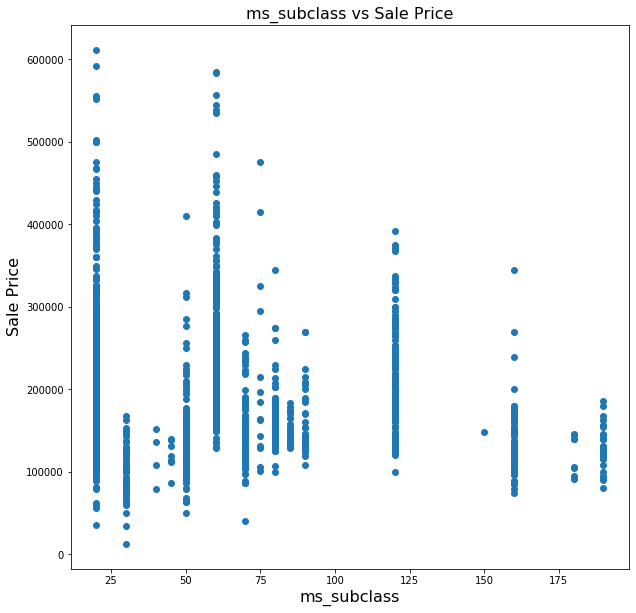

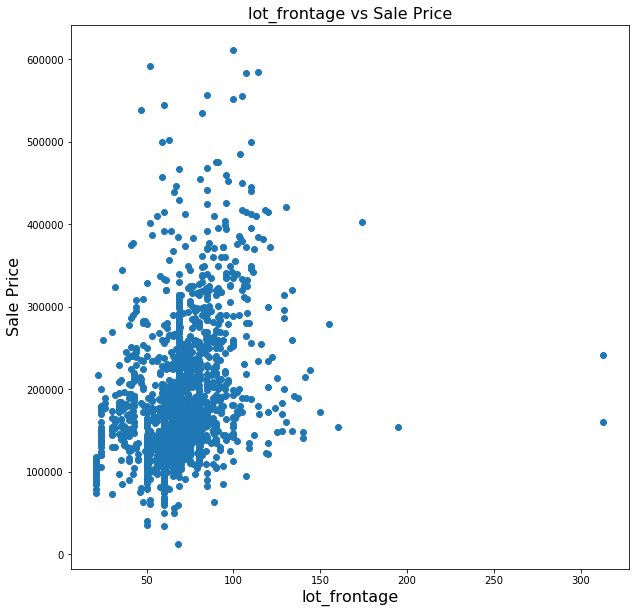

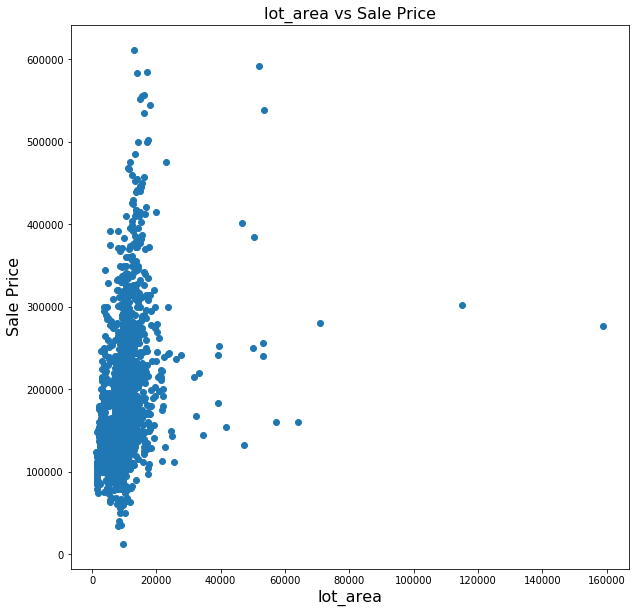

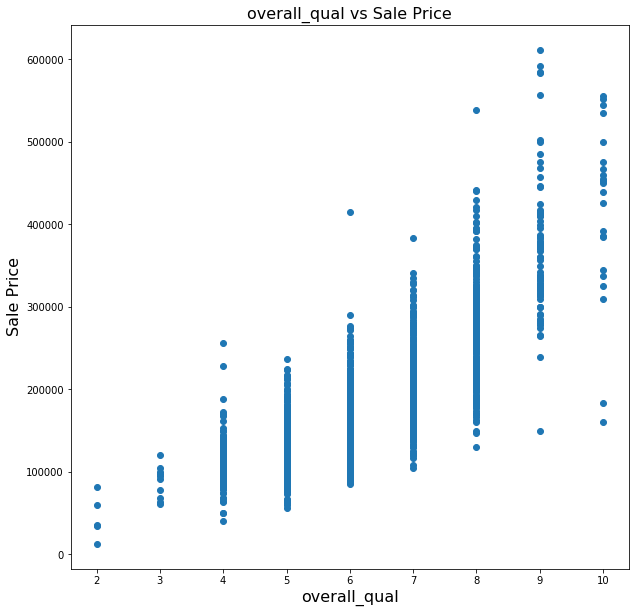

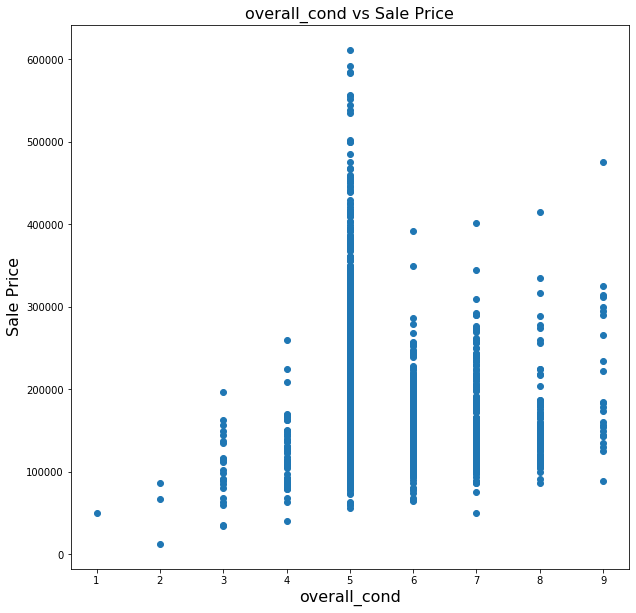

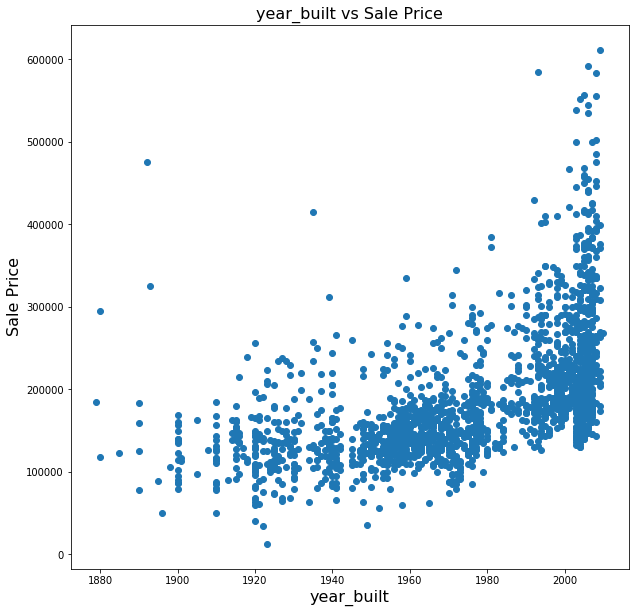

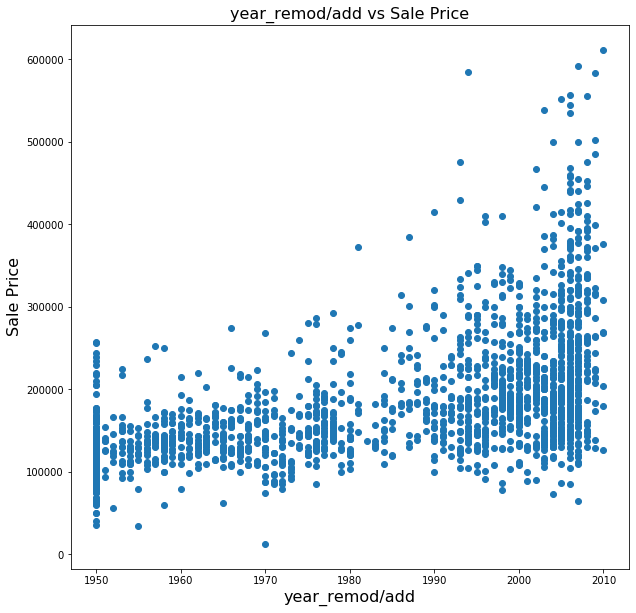

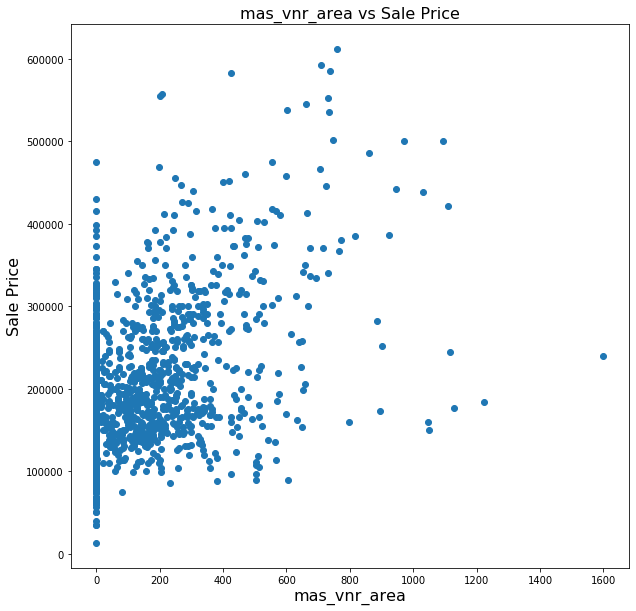

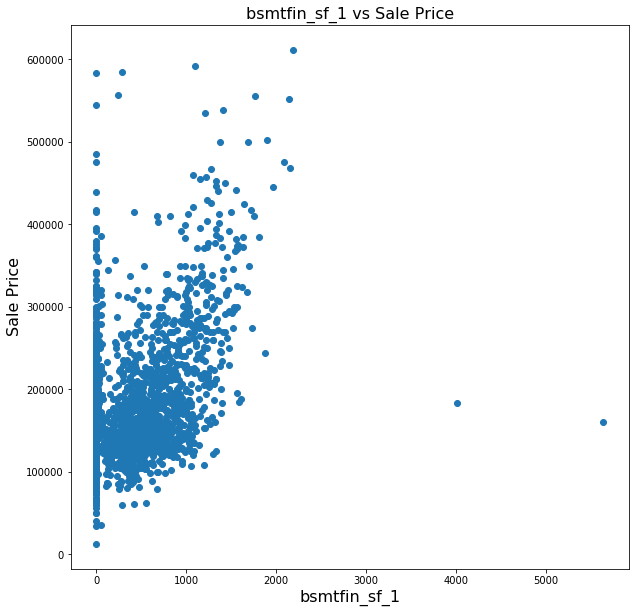

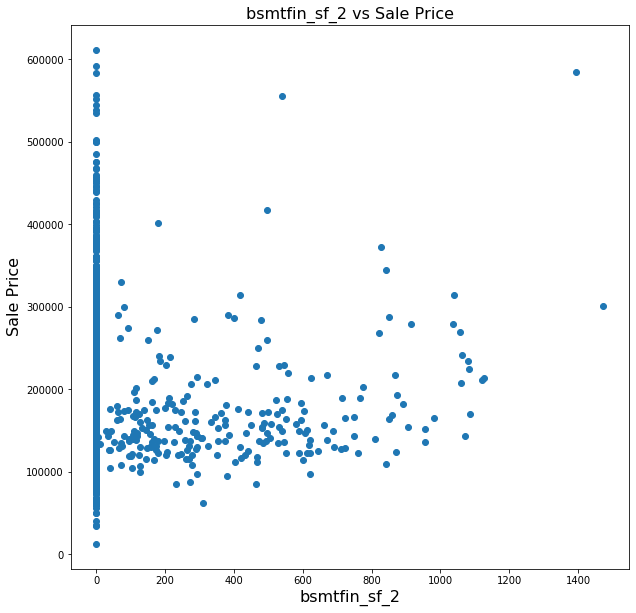

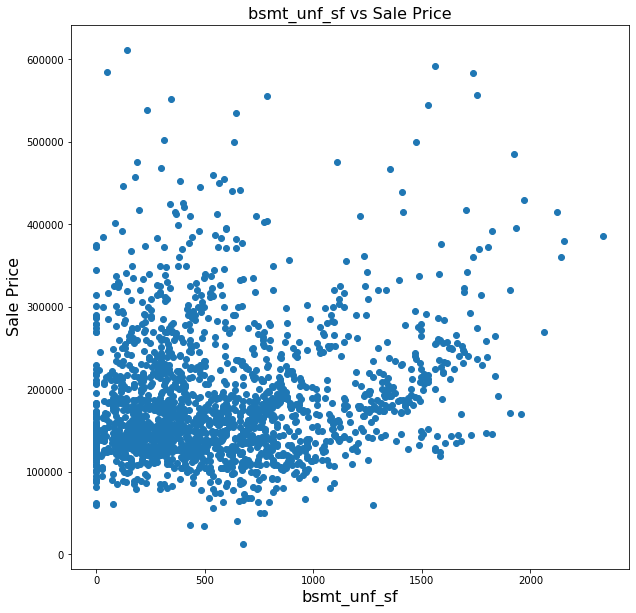

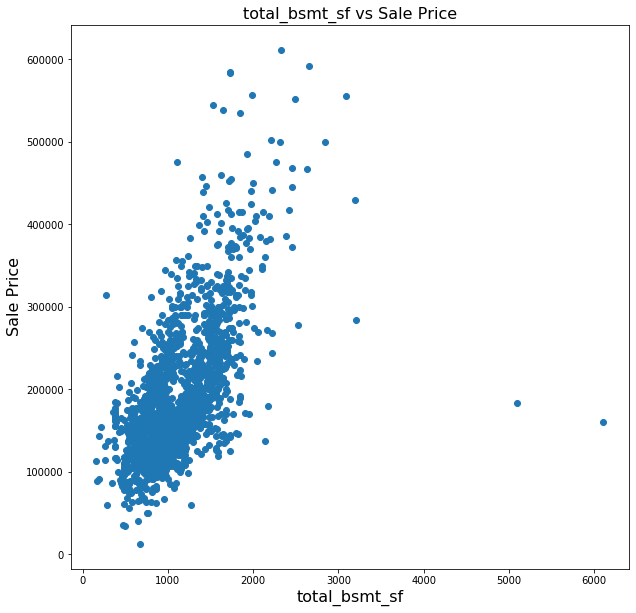

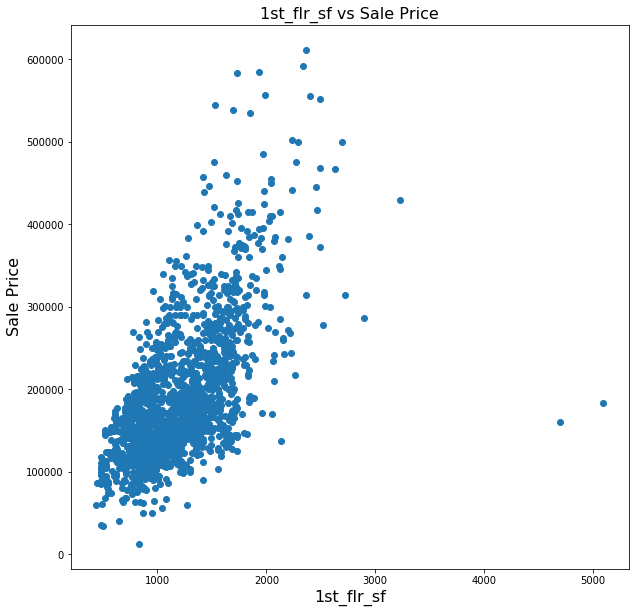

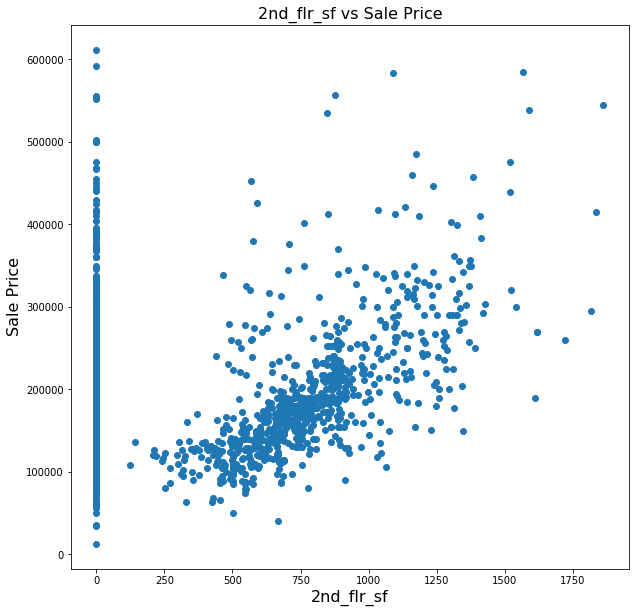

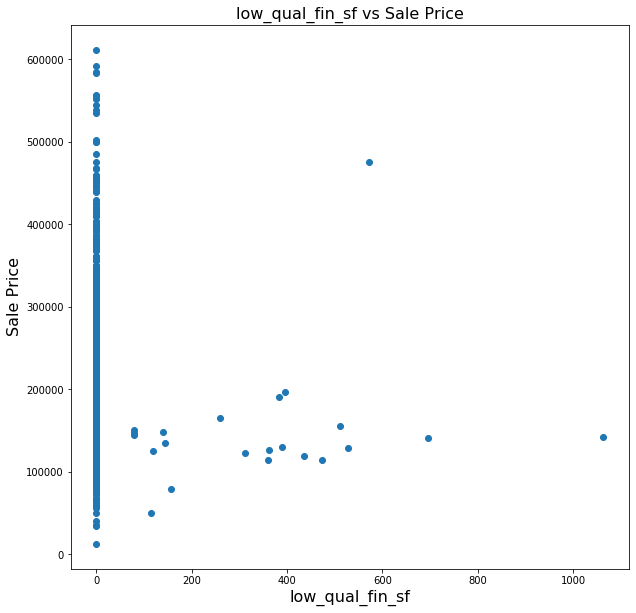

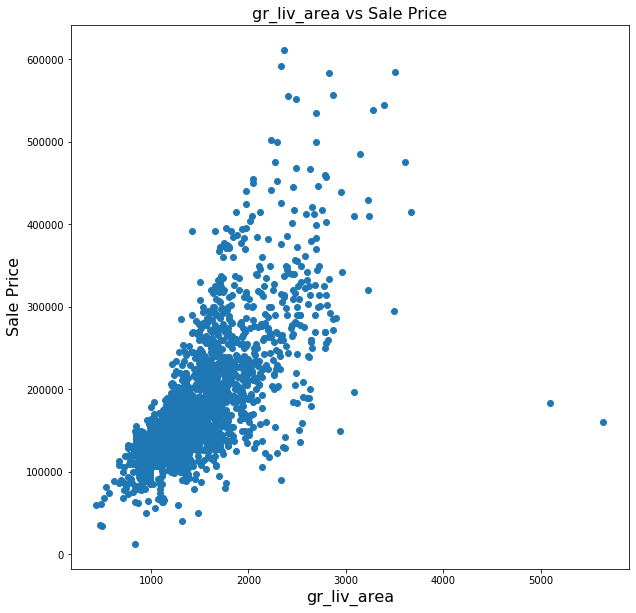

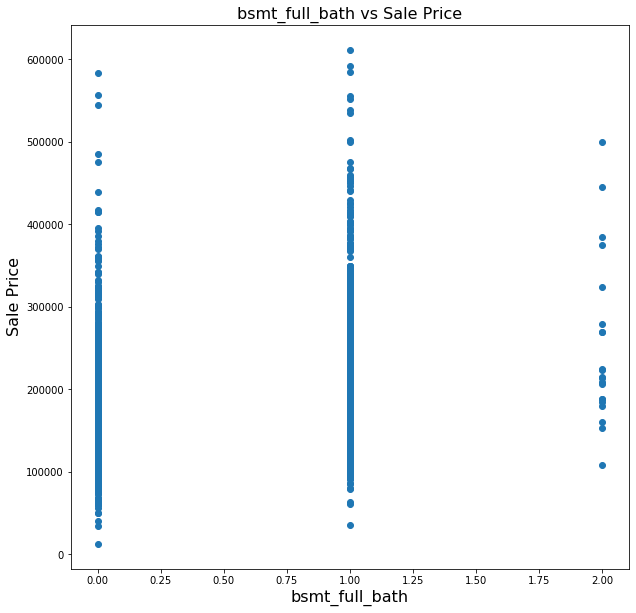

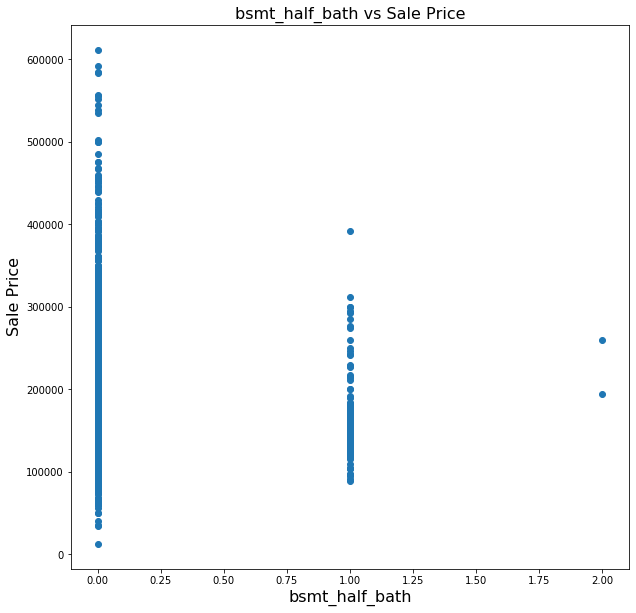

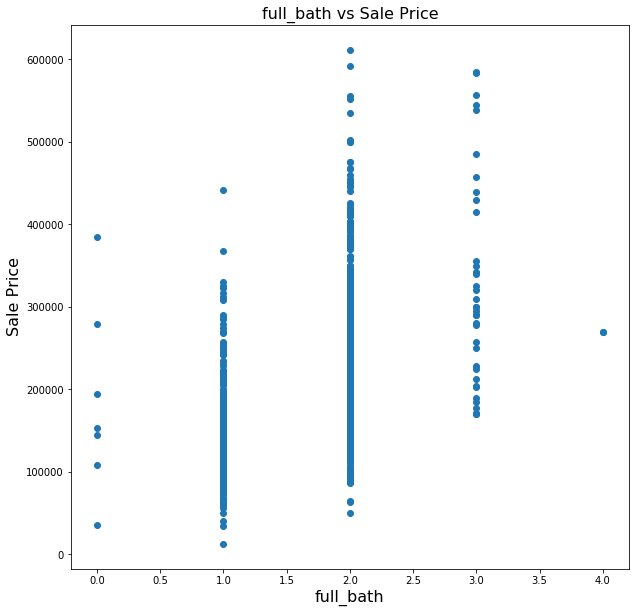

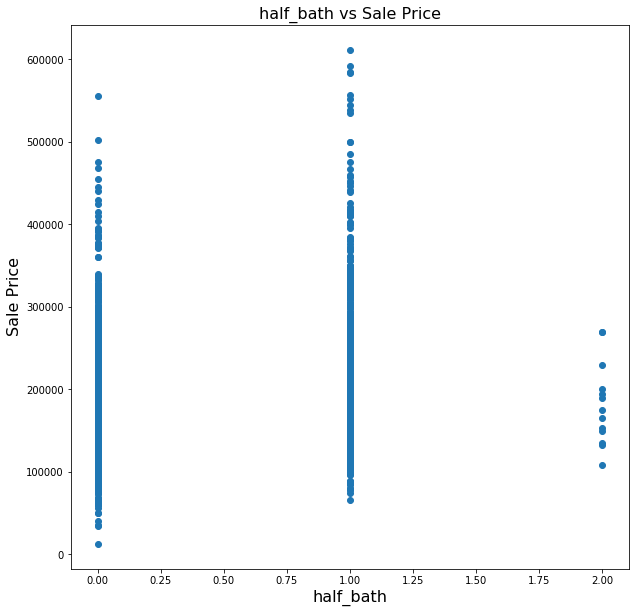

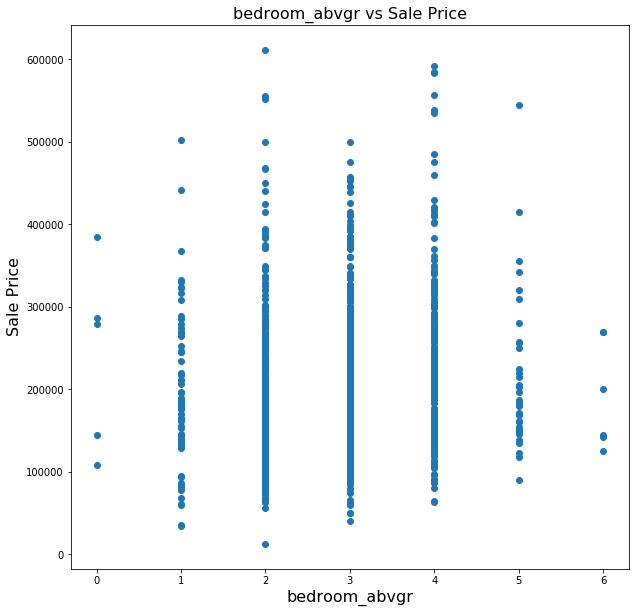

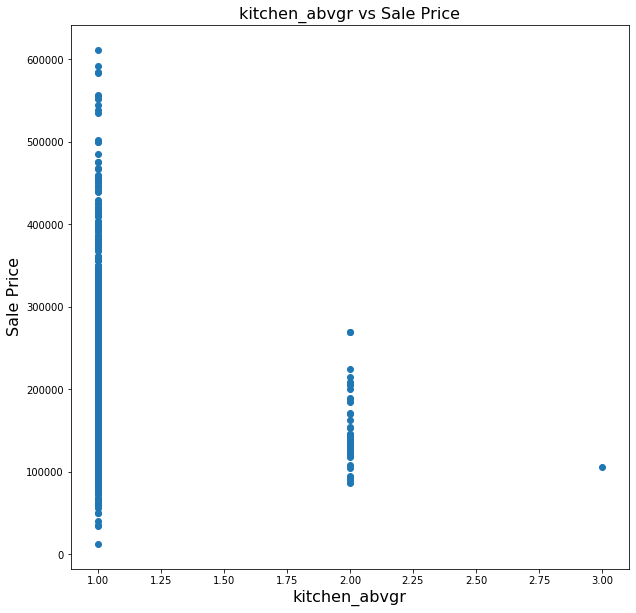

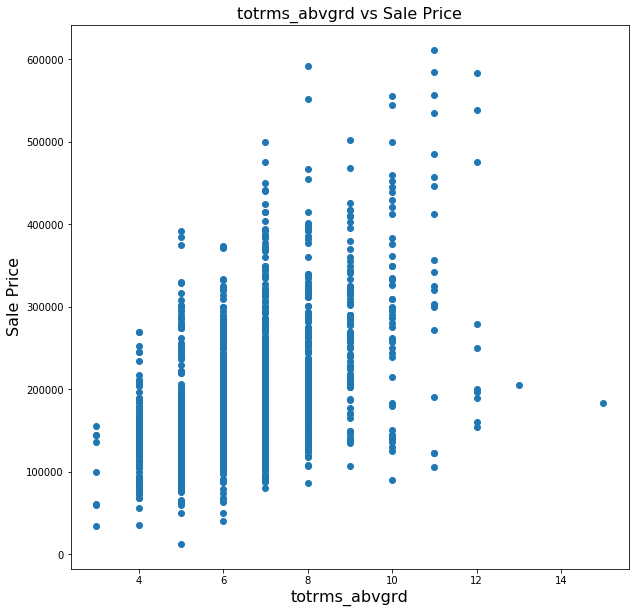

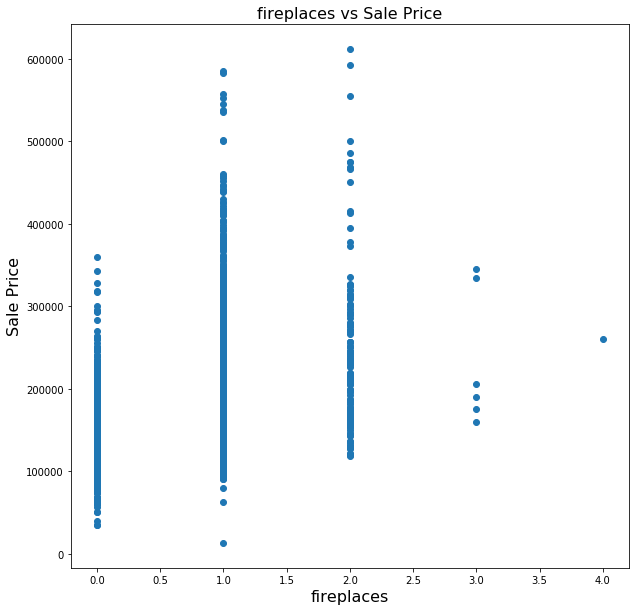

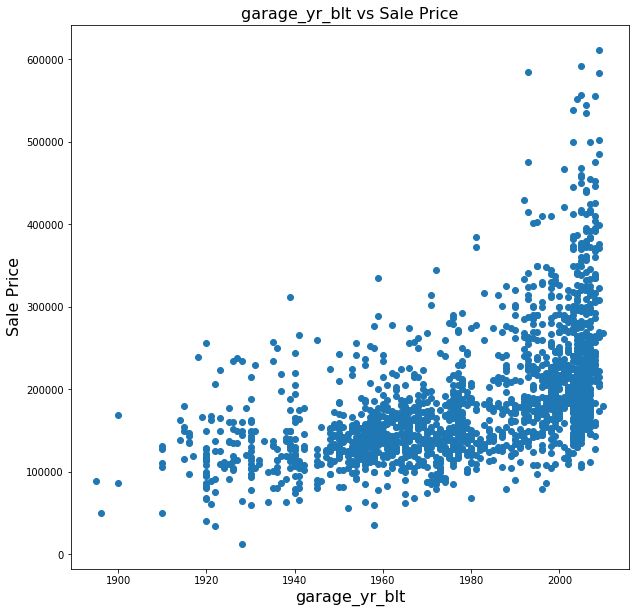

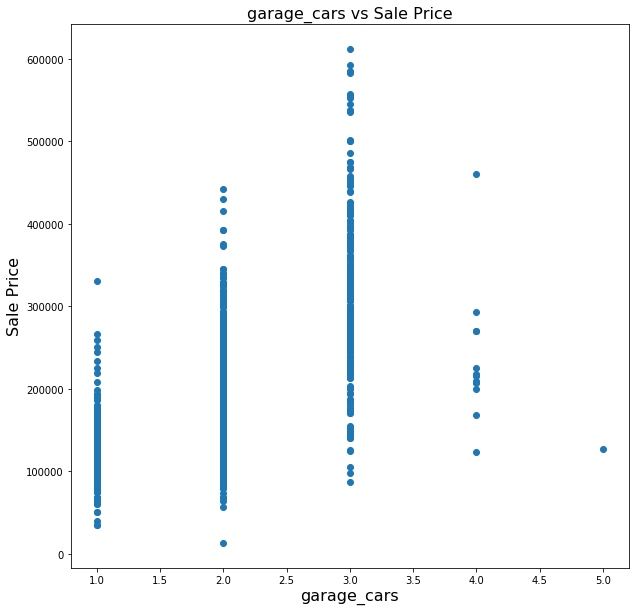

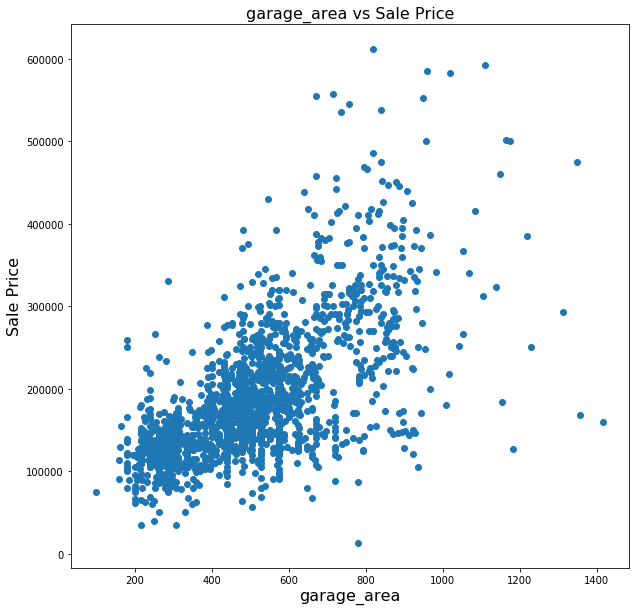

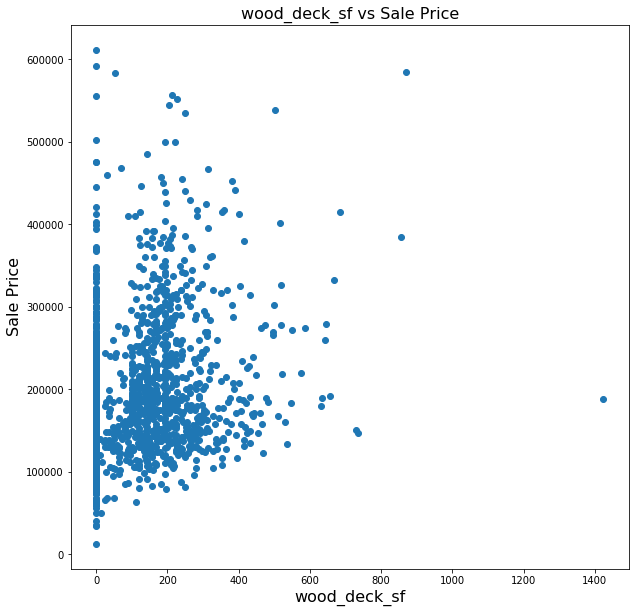

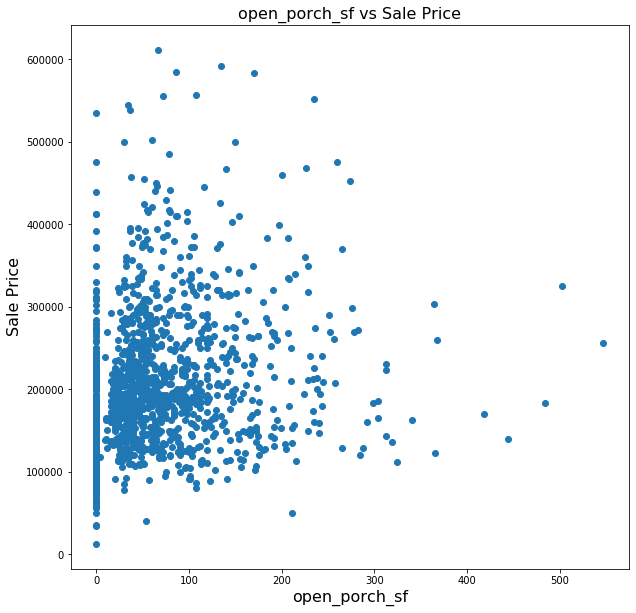

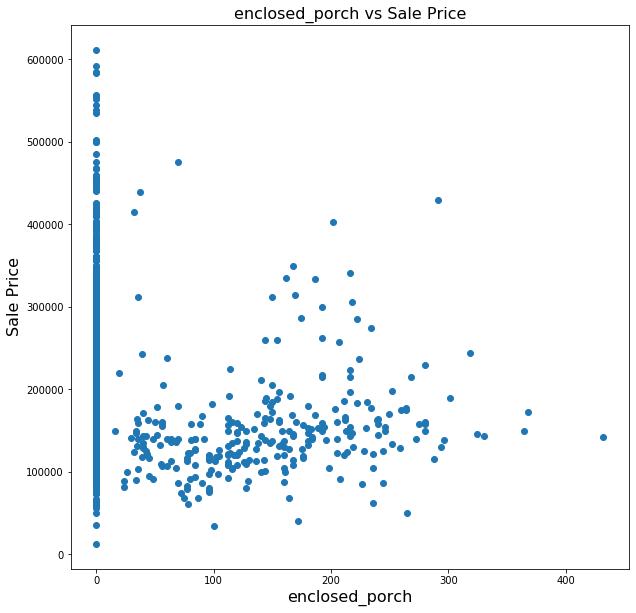

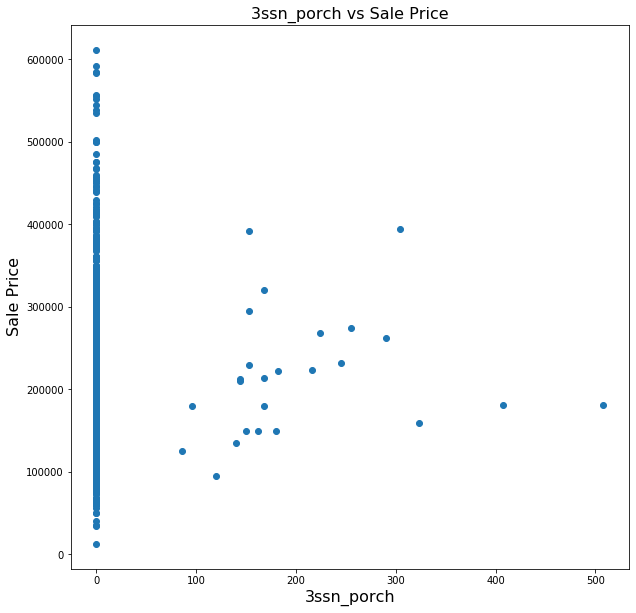

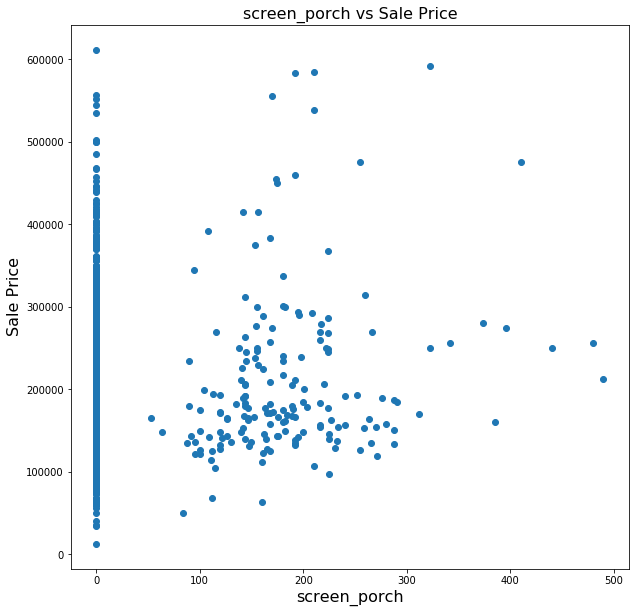

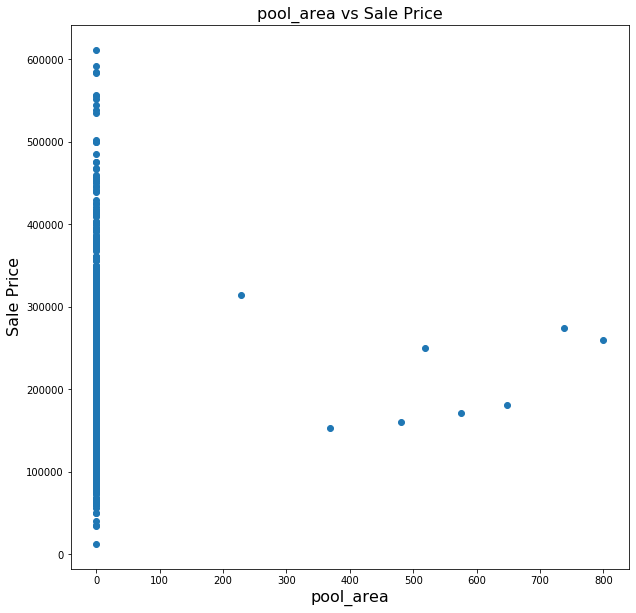

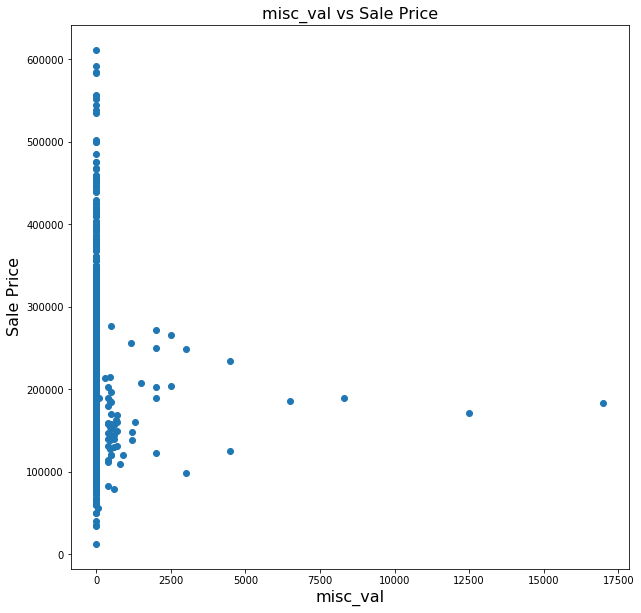

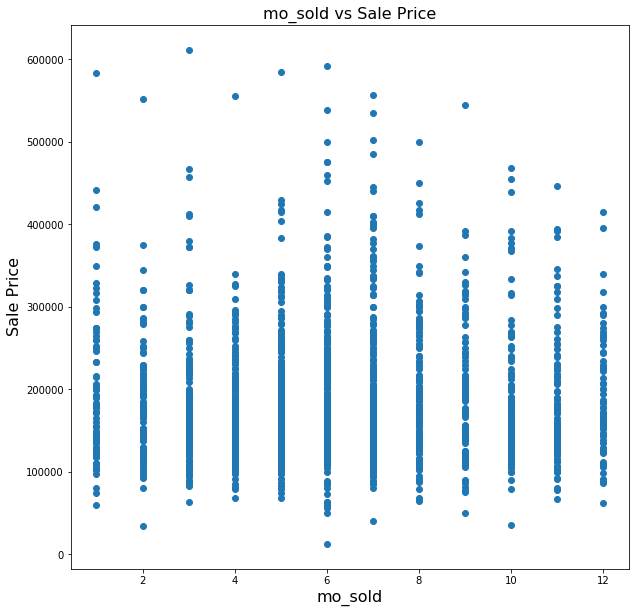

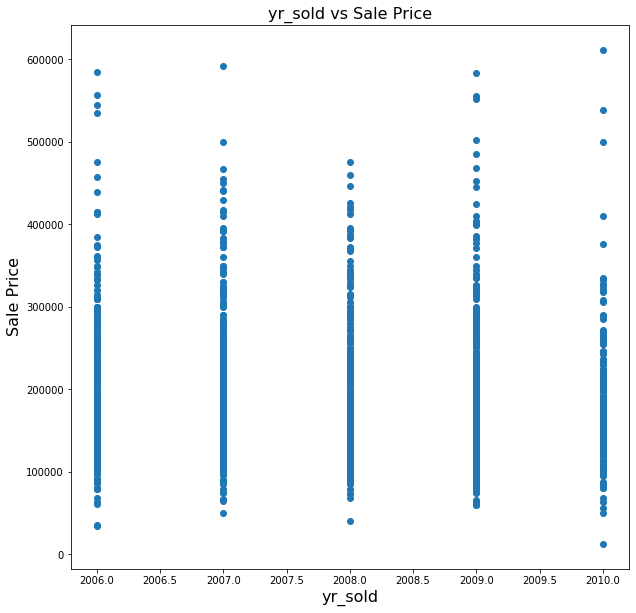

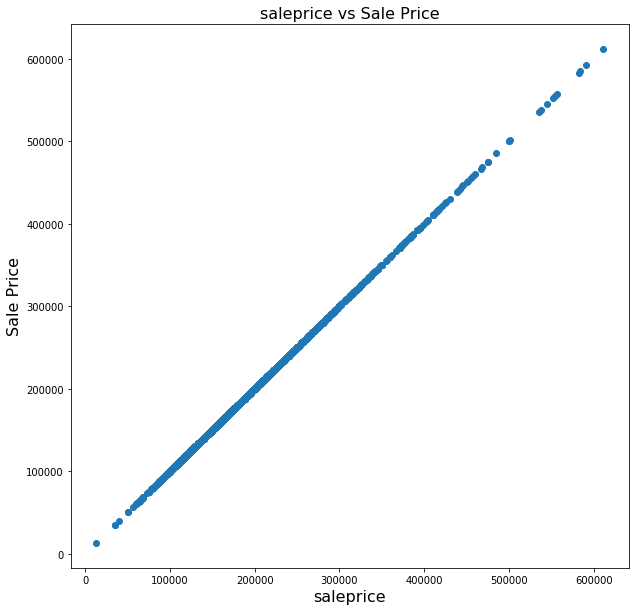

In [32]:
# Let's visually explore the relationship between the numeric columns and sale price

for column in ames._get_numeric_data().columns:
    fig, ax = plt.subplots(figsize = (10,10))
    plt.scatter(ames.loc[:,column], ames.loc[:,'saleprice'])
    
    ax.set_title(f'{column} vs Sale Price', fontsize = 16)
    ax.set_xlabel(f'{column}', fontsize = 16)
    ax.set_ylabel('Sale Price', fontsize = 16)

We continue our data exploration and cleaning by selecting those features that have a reasonable $(> 50\%)$ correlation coefficient with `saleprice`.

In [33]:
corr_df = ames.corr()
corr_df

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
ms_subclass,1.000000,-0.373570,-0.243875,0.066050,-0.105620,0.079357,0.062517,0.007022,-0.057848,-0.071445,...,0.008695,-0.007751,-0.054826,-0.029461,-0.029877,0.003550,-0.036919,0.012262,-0.030088,-0.071986
lot_frontage,-0.373570,1.000000,0.365379,0.198563,-0.033406,0.103870,0.081567,0.210364,0.218891,0.029267,...,0.093290,0.168832,0.005094,0.032345,0.067814,0.107405,0.049489,-0.014511,0.006523,0.333671
lot_area,-0.243875,0.365379,1.000000,0.113667,-0.014127,0.029818,0.046074,0.172419,0.224878,0.040792,...,0.151875,0.127742,0.011251,0.020819,0.066304,0.085991,0.098565,0.003914,-0.027686,0.296747
overall_qual,0.066050,0.198563,0.113667,1.000000,-0.162833,0.599003,0.571442,0.432681,0.240274,-0.053994,...,0.243157,0.310739,-0.151998,0.029016,0.033352,0.020405,0.023937,0.012204,-0.006157,0.793453
overall_cond,-0.105620,-0.033406,-0.014127,-0.162833,1.000000,-0.426216,-0.007170,-0.155181,-0.067209,0.043298,...,-0.005119,-0.085361,0.124114,0.022180,0.041788,-0.003971,0.017207,0.012795,0.050826,-0.142537
year_built,0.079357,0.103870,0.029818,0.599003,-0.426216,1.000000,0.650017,0.315149,0.251298,-0.040312,...,0.206733,0.226708,-0.373355,0.016878,-0.053172,0.005556,0.000687,-0.010993,0.003136,0.556346
year_remod/add,0.062517,0.081567,0.046074,0.571442,-0.007170,0.650017,1.000000,0.199687,0.141092,-0.074924,...,0.211675,0.264410,-0.245741,0.035938,-0.058086,-0.015805,0.001618,0.016989,0.040140,0.538047
mas_vnr_area,0.007022,0.210364,0.172419,0.432681,-0.155181,0.315149,0.199687,1.000000,0.309371,-0.026527,...,0.153016,0.166402,-0.104466,0.009485,0.078198,0.015447,0.080557,-0.003313,-0.015692,0.504703
bsmtfin_sf_1,-0.057848,0.218891,0.224878,0.240274,-0.067209,0.251298,0.141092,0.309371,1.000000,-0.066603,...,0.196769,0.139573,-0.072347,0.048248,0.090258,0.088099,0.136330,-0.005311,0.045017,0.400662
bsmtfin_sf_2,-0.071445,0.029267,0.040792,-0.053994,0.043298,-0.040312,-0.074924,-0.026527,-0.066603,1.000000,...,0.098868,-0.005511,0.012466,-0.026072,0.094237,0.065949,-0.006267,-0.014488,0.002481,-0.001418


In [34]:
corr_df.loc[np.abs(corr_df.loc['saleprice',:]) > 0.5,'saleprice']

overall_qual      0.793453
year_built        0.556346
year_remod/add    0.538047
mas_vnr_area      0.504703
total_bsmt_sf     0.622943
1st_flr_sf        0.625534
gr_liv_area       0.707045
full_bath         0.550877
totrms_abvgrd     0.535915
garage_yr_blt     0.536322
garage_cars       0.653785
garage_area       0.646241
saleprice         1.000000
Name: saleprice, dtype: float64

In [35]:
# Select columns that have high correlation with price

cols_correlated_with_price = list(corr_df.loc[np.abs(corr_df.loc['saleprice',:]) > 0.5,'saleprice'].index)
cols_correlated_with_price

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'saleprice']

In [36]:
non_numeric_columns_ = list(set(ames.columns) - set(ames.describe().T.index))
non_numeric_columns_

['exterior_2nd',
 'mas_vnr_type',
 'garage_finish',
 'heating_qc',
 'exterior_1st',
 'lot_shape',
 'fireplace_qu',
 'season_sold',
 'house_style',
 'exter_qual',
 'foundation',
 'bsmt_qual',
 'kitchen_qual',
 'neighborhood',
 'garage_type',
 'bsmtfin_type_1']

In [37]:
cols_correlated_with_price_list = list(set(cols_correlated_with_price))

ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_]

,garage_yr_blt,mas_vnr_area,year_built,year_remod/add,gr_liv_area,1st_flr_sf,total_bsmt_sf,totrms_abvgrd,garage_cars,saleprice,...,fireplace_qu,season_sold,house_style,exter_qual,foundation,bsmt_qual,kitchen_qual,neighborhood,garage_type,bsmtfin_type_1
id,,,,,,,,,,,,,,,,,,,,,
109,1976.0,289.0,1976,2005,1479,725,725.0,6,2.0,130500,...,NA,spring,2Story,Gd,CBlock,TA,Gd,Sawyer,Attchd,GLQ
544,1997.0,132.0,1996,1997,2122,913,913.0,8,2.0,220000,...,TA,spring,2Story,Gd,PConc,Gd,Gd,SawyerW,Attchd,GLQ
153,1953.0,0.0,1953,2007,1057,1057,1057.0,5,1.0,109000,...,NA,winter,1Story,TA,CBlock,TA,Gd,NAmes,Detchd,GLQ
318,2007.0,0.0,2006,2007,1444,744,384.0,7,2.0,174000,...,NA,spring,2Story,TA,PConc,Gd,TA,Timber,BuiltIn,Unf
255,1957.0,0.0,1900,1993,1445,831,676.0,6,2.0,138500,...,NA,spring,1.5Fin,TA,PConc,Fa,TA,SawyerW,Detchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2007.0,0.0,2007,2007,1728,1728,1884.0,7,2.0,298751,...,Gd,winter,1Story,Gd,PConc,Gd,Gd,Timber,Attchd,GLQ
785,1961.0,0.0,1940,1950,861,861,861.0,4,2.0,82500,...,NA,spring,1Story,TA,CBlock,TA,TA,Edwards,Detchd,BLQ
916,1929.0,0.0,1928,1950,1913,1172,896.0,9,2.0,177000,...,TA,spring,1.5Fin,TA,BrkTil,TA,TA,Crawfor,Detchd,Unf


In [38]:
ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 109 to 10
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   garage_yr_blt   1870 non-null   float64
 1   mas_vnr_area    1870 non-null   float64
 2   year_built      1870 non-null   int64  
 3   year_remod/add  1870 non-null   int64  
 4   gr_liv_area     1870 non-null   int64  
 5   1st_flr_sf      1870 non-null   int64  
 6   total_bsmt_sf   1870 non-null   float64
 7   totrms_abvgrd   1870 non-null   int64  
 8   garage_cars     1870 non-null   float64
 9   saleprice       1870 non-null   int64  
 10  garage_area     1870 non-null   float64
 11  overall_qual    1870 non-null   int64  
 12  full_bath       1870 non-null   int64  
 13  exterior_2nd    1870 non-null   object 
 14  mas_vnr_type    1870 non-null   object 
 15  garage_finish   1870 non-null   object 
 16  heating_qc      1870 non-null   object 
 17  exterior_1st    1870 non-null   o

In [39]:
ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].describe().T

,count,mean,std,min,25%,50%,75%,max
garage_yr_blt,1870.0,1978.702674,24.921929,1895.0,1961.00,1980.0,2002.0,2010.0
mas_vnr_area,1870.0,106.498396,179.438598,0.0,0.00,0.0,172.0,1600.0
year_built,1870.0,1973.508556,29.278001,1879.0,1956.00,1976.0,2002.0,2010.0
year_remod/add,1870.0,1985.065241,20.626699,1950.0,1966.25,1994.0,2004.0,2010.0
gr_liv_area,1870.0,1516.147059,494.705792,438.0,1152.00,1458.0,1735.5,5642.0
1st_flr_sf,1870.0,1176.400535,394.077755,438.0,889.00,1105.0,1422.0,5095.0
total_bsmt_sf,1870.0,1097.502674,421.047464,160.0,819.00,1028.5,1342.0,6110.0
totrms_abvgrd,1870.0,6.448663,1.516552,3.0,5.00,6.0,7.0,15.0
garage_cars,1870.0,1.881283,0.652462,1.0,1.00,2.0,2.0,5.0
saleprice,1870.0,187090.068984,78641.415548,12789.0,135000.00,167900.0,218375.0,611657.0


Data cleaning appears to be successful, so we can export this dataframe to a new csv file for use in modelling. We will also apply the same methods to `test.csv`

In [40]:
%pwd

'C:\\Users\\gabri\\Dropbox\\General Assembly\\git_homeworks\\DSI-9-submissions\\gabrieljdusing\\project_2_submission'

In [41]:
ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].to_csv('./datasets/ames_cleaned.csv')

## Clean `test.csv` in the same way we did for `train.csv`

In [42]:
test_path = './datasets/test.csv'

ames_test = pd.read_csv(test_path)

In [43]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [44]:
ames_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


In [45]:
# Remove spaces and make all labels lower case
ames_test.columns = [column.lower().replace(' ', '_') for column in ames_test.columns]

ames_test.drop('pid', axis = 1, inplace = True)
ames_test.set_index('id', inplace = True, verify_integrity = True)

ames_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      878 non-null    int64  
 1   ms_zoning        878 non-null    object 
 2   lot_frontage     718 non-null    float64
 3   lot_area         878 non-null    int64  
 4   street           878 non-null    object 
 5   alley            58 non-null     object 
 6   lot_shape        878 non-null    object 
 7   land_contour     878 non-null    object 
 8   utilities        878 non-null    object 
 9   lot_config       878 non-null    object 
 10  land_slope       878 non-null    object 
 11  neighborhood     878 non-null    object 
 12  condition_1      878 non-null    object 
 13  condition_2      878 non-null    object 
 14  bldg_type        878 non-null    object 
 15  house_style      878 non-null    object 
 16  overall_qual     878 non-null    int64  
 17  overall_cond

In [46]:
ames_test['season_sold'] = ames_test['mo_sold'].apply(season_from_month)
ames_test.loc[:,'season_sold'].value_counts(normalize = True)

summer    0.497722
fall      0.190205
spring    0.186788
winter    0.125285
Name: season_sold, dtype: float64

In [47]:
test_columns = set(cols_correlated_with_price_list + non_numeric_columns_) - set(['saleprice'])

In [48]:
ames_test = ames_test[test_columns]

In [49]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   garage_yr_blt   833 non-null    float64
 1   mas_vnr_area    877 non-null    float64
 2   year_built      878 non-null    int64  
 3   exterior_1st    878 non-null    object 
 4   lot_shape       878 non-null    object 
 5   year_remod/add  878 non-null    int64  
 6   fireplace_qu    456 non-null    object 
 7   1st_flr_sf      878 non-null    int64  
 8   total_bsmt_sf   878 non-null    int64  
 9   house_style     878 non-null    object 
 10  exter_qual      878 non-null    object 
 11  neighborhood    878 non-null    object 
 12  overall_qual    878 non-null    int64  
 13  season_sold     878 non-null    object 
 14  bsmtfin_type_1  853 non-null    object 
 15  exterior_2nd    878 non-null    object 
 16  mas_vnr_type    877 non-null    object 
 17  garage_finish   833 non-null   

In [50]:
# Distribution with of missing data
columns_w_missing_test = [(name, value) for (name, value) in zip(ames_test.isna().sum().index, ames_test.isna().sum().values) if value > 0]
columns_w_missing

[('lot_frontage', 330),
 ('alley', 1911),
 ('mas_vnr_type', 22),
 ('mas_vnr_area', 22),
 ('bsmt_qual', 55),
 ('bsmt_cond', 55),
 ('bsmt_exposure', 58),
 ('bsmtfin_type_1', 55),
 ('bsmtfin_type_2', 56),
 ('bsmt_full_bath', 2),
 ('bsmt_half_bath', 2),
 ('fireplace_qu', 1000),
 ('garage_type', 113),
 ('garage_yr_blt', 114),
 ('garage_finish', 114),
 ('garage_qual', 114),
 ('garage_cond', 114),
 ('pool_qc', 2042),
 ('fence', 1651),
 ('misc_feature', 1986)]

We can't drop the test rows for our kaggle submission, so we'll impute them.

In [51]:
# `fireplace_qu` needs to be handled differently as `NA` has a specific meaning here

ames_test.loc[:,'fireplace_qu'].fillna('NA', inplace = True)
ames_test.loc[:,'fireplace_qu'].isna().sum()

0

In [52]:
cols_with_missing = [name for (name, value) in zip(ames_test.isna().sum().index, ames_test.isna().sum().values) if value > 0]
cols_with_missing

['garage_yr_blt',
 'mas_vnr_area',
 'bsmtfin_type_1',
 'mas_vnr_type',
 'garage_finish',
 'bsmt_qual',
 'garage_type']

In [53]:
ames_test.loc[:,cols_with_missing]

,garage_yr_blt,mas_vnr_area,bsmtfin_type_1,mas_vnr_type,garage_finish,bsmt_qual,garage_type
id,,,,,,,
2658,1910.0,0.0,Unf,None,Unf,Fa,Detchd
2718,1977.0,0.0,Unf,None,Fin,Gd,Attchd
2414,2006.0,0.0,GLQ,None,RFn,Gd,Attchd
1989,1935.0,0.0,Unf,None,Unf,TA,Detchd
625,1963.0,247.0,BLQ,BrkFace,RFn,Gd,Attchd
...,...,...,...,...,...,...,...
1662,1974.0,0.0,ALQ,None,Unf,TA,Attchd
1234,1966.0,410.0,BLQ,BrkFace,RFn,TA,Attchd
1373,1968.0,0.0,BLQ,None,Unf,TA,Attchd


In [54]:
# Use sklearn's imputer to handle missing data
from sklearn.impute import SimpleImputer

In [55]:
imputer_cat = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
ames_test.loc[:,['garage_finish','bsmt_qual','mas_vnr_type','bsmtfin_type_1','garage_type']] = imputer_cat.fit_transform(ames_test.loc[:,['garage_finish','bsmt_qual','mas_vnr_type','bsmtfin_type_1','garage_type']])

In [56]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   garage_yr_blt   833 non-null    float64
 1   mas_vnr_area    877 non-null    float64
 2   year_built      878 non-null    int64  
 3   exterior_1st    878 non-null    object 
 4   lot_shape       878 non-null    object 
 5   year_remod/add  878 non-null    int64  
 6   fireplace_qu    878 non-null    object 
 7   1st_flr_sf      878 non-null    int64  
 8   total_bsmt_sf   878 non-null    int64  
 9   house_style     878 non-null    object 
 10  exter_qual      878 non-null    object 
 11  neighborhood    878 non-null    object 
 12  overall_qual    878 non-null    int64  
 13  season_sold     878 non-null    object 
 14  bsmtfin_type_1  878 non-null    object 
 15  exterior_2nd    878 non-null    object 
 16  mas_vnr_type    878 non-null    object 
 17  garage_finish   878 non-null   

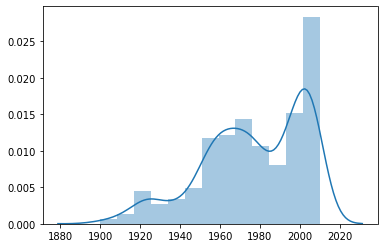

In [57]:
# What values would be appropriate for imputing the `garage_yr_blt` column?
# From the plot, it looks like 'most_frequent' would useful

sns.distplot(ames_test.loc[:,['garage_yr_blt']])

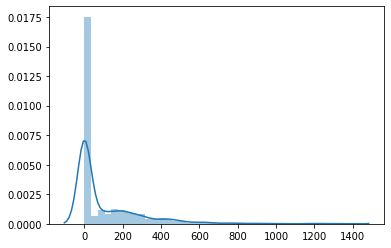

In [58]:
# What values would be appropriate for imputing the `mas_vnr_area` column?
# Again, from the plot, 'most_frequent' seems to be reasonable

sns.distplot(ames_test.loc[:,['mas_vnr_area']])

In [59]:
imputer_num = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')

ames_test.loc[:,['garage_yr_blt', 'mas_vnr_area']] = imputer_num.fit_transform(ames_test.loc[:,['garage_yr_blt', 'mas_vnr_area']])

In [60]:
ames_test.shape[1]

28

In [61]:
ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].shape[1]

29

In [62]:
# export our test data

ames_test.to_csv('./datasets/ames_test_cleaned.csv')

In [63]:
# Export feature names and datatypes to spreadsheet for making data dictionary

pd.DataFrame(zip(ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].columns,ames.loc[:,cols_correlated_with_price_list + non_numeric_columns_].dtypes), columns = ['Feature', 'Type']).to_csv('dataset_features_and_types.csv')